<a href="https://colab.research.google.com/github/Bharathkumar1011/fIrst-AI--Rag-_learning/blob/main/resume_ranlwithplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
candidates_data = [{'Name': 'col', "Education": "b.tech", "Experience": '0', 'Skills': ['python', 'Data Analysis', 'Data Science',], 'Certification':'0'},
             {'Name': 'pol', "Education": ["b.tech",'M.sc'], "Experience": '4', 'Skills': ['python', 'Data Analysis', 'Data Science', 'SQL'], 'Certification':'2'}]

In [47]:
job_description = 'Looking for a Data Scientist with expertise in Python, Data Analysis, Data Science, SQL. Must have 5+ years of experience and hold certifications like 3. Educational qualifications required are: B.Tech, M.Sc.'



In [89]:
from sentence_transformers import SentenceTransformer, util

# Load pre-trained Sentence Transformer model
# model = SentenceTransformer('all-MiniLM-L6-v2')
models = ['all-MiniLM-L6-v2','paraphrase-albert-small-v2','all-mpnet-base-v2']
for model_name in models:
  model = SentenceTransformer(model_name)

def match_resume_to_job(resume: str, job_description: str):
    """
    Compare a resume to a job description and compute similarity score.
    """
    embeddings = model.encode([resume, job_description])
    similarity = util.cos_sim(embeddings[0], embeddings[1])
    return similarity.item()

In [108]:

# Another Function for your ref:
def rank_candidates(candidates, job_description):
    """
    Rank candidates based on resume matching and extracted data.
    """
    scores = []
    for model_name in models:
     model = SentenceTransformer(model_name)
     for candidate in candidates:
          skill_score = match_resume_to_job(" ".join(candidate["Skills"]), job_description)
          experience_score = match_resume_to_job(candidate["Experience"], job_description)
          education_score = match_resume_to_job(" ".join(candidate["Education"]), job_description)

          total_score = 0.4 * skill_score + 0.3 * experience_score + 0.3 * education_score
          scores.append({"Name": candidate["Name"], "Score": total_score})
          scores.append({"name": model_name})
     return sorted(scores, key=lambda x: x["Score"], reverse=True)

In [109]:
type(candidates_data)

list

In [110]:
candidates_data[0]["Skills"]

['python', 'Data Analysis', 'Data Science']

In [111]:
# similarity_score = match_resume_to_job(resume22, job_des33)
# similarity_score

In [112]:
order = rank_candidates(candidates_data,job_description)
order

KeyError: 'Score'

In [100]:
import matplotlib.pyplot as plt


In [63]:
import numpy as np

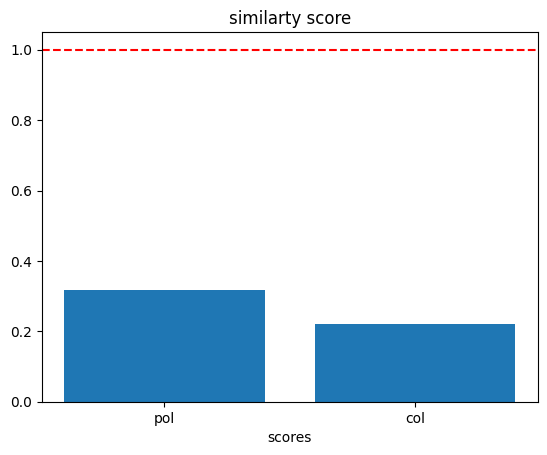

In [73]:
Names = [ 'pol','col']
scores = [0.3174015492200852,0.22011882849037648]

plt.bar(Names, scores)
plt.axhline(y=1, color='red', linestyle='--', label='Max Similarity (1)')

plt.title('similarty score')
plt.xlabel('names')
plt.xlabel('scores')
plt.show()

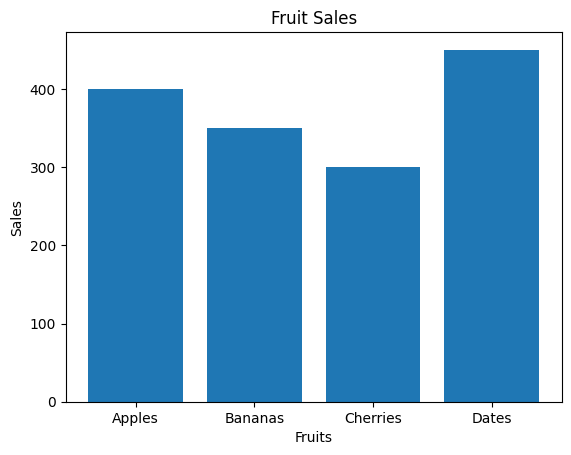

In [65]:
import numpy as np

fruits = ['Apples', 'Bananas', 'Cherries', 'Dates']
sales = [400, 350, 300, 450]

plt.bar(fruits, sales)
plt.title('Fruit Sales')
plt.xlabel('Fruits')
plt.ylabel('Sales')
plt.show()